## Besonderheit inkompressibler Strömung - Die Poisson-Gleichung

Wie wir bereits gesehen haben, benötigen wir die Poisson-Gleichung, um die Divergenzfreiheit des Geschwindigkeitsfeldes (=die Kontinuität) bei inkompressibler Strömung zu gewährleisten. 

Sie lautet in 2D:

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Für unsere Versuche mit der Poisson-Gleichung allein, fassen wir die rechte Seite der Gleichung als einen Skalar $b$ zusammen:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

Die Diskretisierung funktioniert wie schon mehrmals geübt: die zweite Ableitung diskretisieren wir mit einem Zentraldifferenzenansatz:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

und lösen diese nach dem Druck am gesuchten Punkt $(i,j)$ auf:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

In der Gleichung kommt nur der Zeitpunkt $n$ vor, da die Gleichung ja nicht von der Zeit abhängt. Da wir die Gleichung ausgehend von einer anfänglichen Schätzung für das Druckfeld iterativ lösen müssen, können wir ein Pseudo-Zeitschrittverfahren verwenden, indem wir sie wie folgt formulieren:

$$p_{i,j}^{n+1}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

Wir werden die Gleichung lösen mit einer anfänglichen Schätzung von $p=0$ überall im Gebiet. Außerdem legen wir als Randbedingung fest, dass

$p(x=0) = 0$, $p(x=L) = 0$, $p(y=0) = 0$ und $p(y=L) = 0$

der Quellterm $b$ ist überall im Strömungsgebiet gleich Null, bis auf zwei Punkte:

$b_{i,j}=100$ bei $i=\frac{1}{4} nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ bei $i=\frac{3}{4} nx, j=\frac{3}{4} ny$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
# Variablen
L  = 2.0        # Länge des Rechengebiets
H  = 1.0        # Höhe des Rechengebiets
nx = 50         # Anzahl der diskreten Punkte in x-Richtung
ny = 50         # Anzahl der diskreten Punkte in y-Richtung
dx = L / (nx-1) # Abstand zwischen den Punkten in x-Richtung
dy = H / (ny-1) # Abstand zwischen den Punkten in y-Richtung
nt = 1000

p_init = np.zeros((ny,nx))       # ganzes Gebiet mit p=0 belegen

# konstanter Quellterm
b = np.zeros((ny,nx))
b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

xi = np.linspace(0,L,nx)       # x-Koordinaten der diskreten Punkte
yi = np.linspace(0,L,ny)       # y-Koordinaten der diskreten Punkte

p_alt = p_init.copy()
p_neu = p_init.copy()

for it in range(nt):
    p_neu[1:-1,1:-1] = (((p_alt[1:-1, 2:] + p_alt[1:-1, :-2]) * dy**2 +
                    (p_alt[2:, 1:-1] + p_alt[:-2, 1:-1]) * dx**2 -
                    b[1:-1, 1:-1] * dx**2 * dy**2) / 
                    (2 * (dx**2 + dy**2)))

    p_neu[0, :] = 0
    p_neu[ny-1, :] = 0
    p_neu[:, 0] = 0
    p_neu[:, nx-1] = 0
    p_alt = p_neu.copy()

In [4]:
def plot2D(x, y, p):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap='plasma',
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

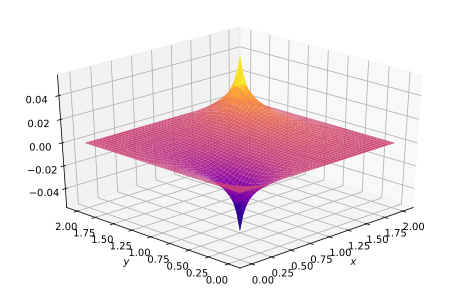

In [5]:
plot2D(xi, yi, p_neu)

Wenn wir die Poisson-Gleichung nochmal genauer anschauen, dann wird deutlich, dass diese große Ähnlichkeit mit den diffusiven Termen der Navier-Stokes-Gleichung hat.

Die Gleichung wirkt deshalb diffusiv, d.h. sie versucht eine möglichst *glatte* Lösung unter den gegebenen Randbedingungen und Quelltermen zu bekommen. Sie ist z.B. auch eine Möglichkeit, um glatte Oberflächen zu erzeugen, die sich bestimmten Punkten im Raum annähern.

Als [nächstes](TFD - 3.9 Kontinuumsstroemungen - Cavity.ipynb) bauen wir alle einzelteile zusammen und berechnen eine Kavität mit bewegter Wand.


---
Dieses Notebook folgt einer Idee von Lorena A. Barba und deren exzellenter Ausarbeitung in Python (["12 Steps to Navier Stokes"](http://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)).

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()